In [1]:
import os, inspect, sys
import numpy as np
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = '/home/trxw/Documents/ML/rl-quantum-gates/ml-q-channel-all/modular/cp/trappedionsqsim/'
sys.path.insert(0,parentdir) 
from trappedionsqsim.utils.simulations import Simulation as simulation
import matplotlib.pyplot as plt
import qutip as qtp

In [83]:
#Initialize Simulation instance 
t1 = 0
N = 1000
N_Ramsey = 30
tau = 1.
t_list = [np.linspace(t1 + tau*i, t1 + tau*(i+1), N ) for i in range(N_Ramsey)]

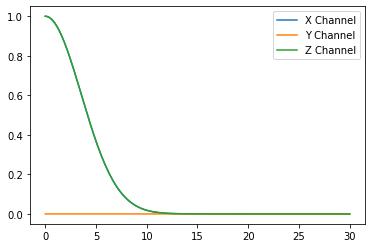

In [125]:
#With splines

#Define x,y,z channels
func_list = [lambda t: np.exp(-(t / 5.)** 2), lambda t: 0. ,lambda t: np.exp(-(t / 5.)** 2) ]
data_listX = [np.array([func_list[0](t_arr[j]) for j in range(len(t_arr))]) for t_arr in t_list ]
data_listY = [np.array([func_list[1](t_arr[j]) for j in range(len(t_arr))]) for t_arr in t_list ]
data_listZ = [np.array([func_list[2](t_arr[j]) for j in range(len(t_arr))]) for t_arr in t_list ]

#channel_funcs_dic = {'X': func_list[0], 'Y': func_list[1], 'Z': func_list[2]}


#noise_amp = 0.0
#noisy_func_list = [lambda t: func_list[i](t)+(noise_amp*func_list[i](t))*np.random.randn(t.shape[0]) for i in range(3)]
#noisy_func2 = lambda t: func2(t)+(noise_amp*func2(t))*np.random.randn(t.shape[0])


#channel_funcs_data_dic = {'X':[], 'Y':[], 'Z':[]}

#for channel in channel_funcs_data_dic.keys():
#    for i in range(len(t_list)):
#        channel_funcs_data_dic[channel] += [channel_funcs_data_dic['X'](t_list[i])]
t_arr = np.concatenate(t_list)
data_arrX = np.concatenate(data_listX)
data_arrY = np.concatenate(data_listY)
data_arrZ = np.concatenate(data_listZ)

plt.plot(t_arr, data_arrX, label='X Channel')
plt.plot(t_arr, data_arrY, label='Y Channel')
plt.plot(t_arr, data_arrZ, label='Z Channel')

plt.legend()
plt.show()

In [128]:
#Test Simulation with Cubic Spline:


sim = simulation(1, 2)#, 1, 10)
psi0 = sim.ket([0])#, [2])
sim.set_curr_state(psi0)
#a  = sim.a(1)
#sm = sim.sm(1)
#c_ops = []
#H0 = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)   
#H1 = sim.sx(1)

#### Adding Simulation Stage 
for i in range(len(t_list)):
    Sx = qtp.interpolate.Cubic_Spline(t_list[i][0], t_list[i][-1], data_listX[i])
    Sy = qtp.interpolate.Cubic_Spline(t_list[i][0], t_list[i][-1], data_listY[i])
    Sz = qtp.interpolate.Cubic_Spline(t_list[i][0], t_list[i][-1], data_listZ[i])
    
    H = [ [sim.sx(1), Sx], [sim.sy(1), Sy], [sim.sz(1), Sz]]#, [sim.sx(1), Sy], [sim.sx(1), Sz] ]
    output = sim.evolve_spline(H, t_list[i])
    sim.apply_gate('X')


t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0003186285146984892
No c_ops, using sesolve
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.05s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.07s. Est. time left: 00:00:00:00
70.0%. Run time:   0.09s. Est. time left: 00:00:00:00
80.0%. Run time:   0.10s. Est. time left: 00:00:00:00
90.0%. Run time:   0.11s. Est. time left: 00:00:00:00
Total run time:   0.12s
t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0003089456672897587
Checking time step in time-evolution

20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.04s. Est. time left: 00:00:00:00
50.0%. Run time:   0.05s. Est. time left: 00:00:00:00
60.0%. Run time:   0.06s. Est. time left: 00:00:00:00
70.0%. Run time:   0.07s. Est. time left: 00:00:00:00
80.0%. Run time:   0.08s. Est. time left: 00:00:00:00
90.0%. Run time:   0.09s. Est. time left: 00:00:00:00
Total run time:   0.10s
t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  -2.8921888435104884e-06
Checking time step in time-evolution:
Transition matrix element after first time-step:  -0.00031438794158445473
Checking time step in time-evolution:
Transition matrix element after first time-step:  5.172995079135643e-05
No c_ops, using sesolve
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run 

80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.05s
t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  2.5966585316725396e-06
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0003162599699709366
Checking time step in time-evolution:
Transition matrix element after first time-step:  -3.869133155301538e-05
No c_ops, using sesolve
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run tim

20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s
t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  2.5965064500012895e-06
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0003162599996395343
Checking time step in time-evolution:
Transition matrix element after first time-step:  -3.86910992496992e-05
No c_ops, using sesolve
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run tim

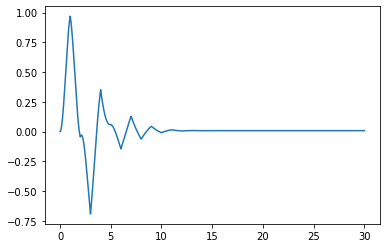

In [129]:
plt.plot(sim.time_arr, qtp.expect(sim.sx(1), sim.states_list) )
plt.show()